# Domestic Office Deposits

## On the Macroeconomic Determinants of Deposit Growth

FDIC: Quarterly Banking Profile https://www.fdic.gov/analysis/quarterly-banking-profile/index.html

FRED: macroeconomic variables https://fred.stlouisfed.org/

| Parameters | Frequency | Transform | FRED |
|:--------|:--------:|:--------:|:--------:|
|  Money stock (M2)   |  Monthly   |  100*diff(log())   | M2SL |
|  GDP   |  Quarterly   |  100*diff(log())   | GDP |
|  Inflation (CPI)   |  Monthly   |  % change   | CPIAUCSL |
|  Federal Funds Rate (%)   |  Monthly   |  N/A   | FEDFUNDS |
|  Treasury spread (%)   |  Daily   |  N/A   | T10Y3M |
|  Corporate bond spread (%)   |  Daily   |  N/A   | BAA10Y |
|  Personal Consumption Expenditures   |  Quarterly   |  100*diff(log())   | PCEC |
|  Compensation of Employees   |  Quarterly   |  100*diff(log())   | COE |
| Disposable Personal Income | Quarterly | 100*diff(log()) | DPI |
| Personal Saving Rate (%) | Monthly | N/A | PSAVERT |
| Unemployment Rate (%) | Monthly | N/A | UNRATE |

# Extreme Gradient Boost (XGBoost)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filename = 'Data.xlsx'
data = pd.read_excel(filename, index_col = 'Date')
data.head()

,Deposits,M2,GDP,INF,FEDFUNDS,BBB,Treasury,UNRATE,SavingRate,DPI,COE,PCE
Date,,,,,,,,,,,,
2004-01-01,5353.735767,6150.1,11923.447,187.1,1.00,2.29,2.91,5.8,4.7,8780.115,6541.308,8048.777
2004-04-01,5462.524945,6270.5,12112.815,188.9,1.03,2.09,3.29,5.6,5.6,8931.039,6668.454,8147.108
2004-07-01,5563.833174,6345.3,12305.307,189.8,1.61,2.11,2.43,5.4,4.4,9039.223,6803.703,8283.335
2004-10-01,5718.670231,6418.3,12527.214,191.7,2.16,1.86,2.02,5.4,6.6,9231.694,6864.486,8448.621
2005-01-01,5827.228967,6441.9,12767.286,193.1,2.63,1.64,1.71,5.2,3.1,9172.882,6926.266,8551.735


## Deposits vs. M2

In [3]:
import pandas_datareader.data as web

In [4]:
# recession data from FRED
recession = 'USREC'

start = pd.to_datetime('1990-01-01')
end = pd.datetime.today()

recs = web.DataReader([recession], 'fred', start, end)

recs_2k = recs['2001']
recs_2k8 = recs['2008']


recs2k_bgn = recs_2k.index[0]
recs2k_end = recs_2k.index[-1]

recs2k8_bgn = recs_2k8.index[0]
recs2k8_end = recs_2k8.index[-1]


C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """
C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  if __name__ == '__main__':
C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  # Remove the CWD from sys.path while we load stuff.


In [5]:
import seaborn as sns

sns.set_style('white', {"xtick.major.size": 2, "ytick.major.size": 2})
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#f4cae4"]
sns.set_palette(sns.color_palette(flatui,7))

C:\Users\Jason\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Domestic Office Deposits')

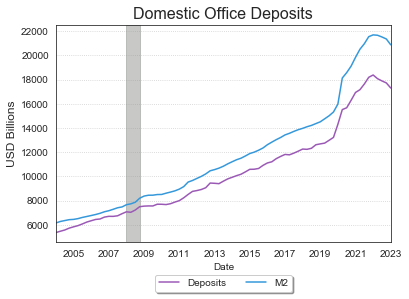

In [6]:
fig, ax = plt.subplots()
data[['Deposits','M2']].plot(ax = ax)

ax.axvspan(recs2k_bgn, recs2k_end, color=sns.xkcd_rgb['grey'], alpha=0.5)
ax.axvspan(recs2k8_bgn, recs2k8_end,  color=sns.xkcd_rgb['grey'], alpha=0.5)

ax.legend(loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True)

ax.set_ylabel('USD Billions', fontsize=12)
ax.grid(True, axis='y', linestyle='dotted')
ax.set_title('Domestic Office Deposits', fontsize=16)

## Data transform

In [7]:
# log price
Log_Deposits = np.log(data['Deposits'])
Log_Deposits.head()

Date
2004-01-01    8.585550
2004-04-01    8.605666
2004-07-01    8.624043
2004-10-01    8.651492
2005-01-01    8.670297
Name: Deposits, dtype: float64

In [8]:
# log returns * 100
Lag_Log_Deposits = Log_Deposits.shift(1)
ret = 100 * (Log_Deposits - Lag_Log_Deposits)
ret.head()

Date
2004-01-01         NaN
2004-04-01    2.011654
2004-07-01    1.837616
2004-10-01    2.744901
2005-01-01    1.880528
Name: Deposits, dtype: float64

In [9]:
mydata = data.copy()

In [10]:
mydata['Deposits'] = ret
mydata.head()

,Deposits,M2,GDP,INF,FEDFUNDS,BBB,Treasury,UNRATE,SavingRate,DPI,COE,PCE
Date,,,,,,,,,,,,
2004-01-01,NaN,6150.1,11923.447,187.1,1.00,2.29,2.91,5.8,4.7,8780.115,6541.308,8048.777
2004-04-01,2.011654,6270.5,12112.815,188.9,1.03,2.09,3.29,5.6,5.6,8931.039,6668.454,8147.108
2004-07-01,1.837616,6345.3,12305.307,189.8,1.61,2.11,2.43,5.4,4.4,9039.223,6803.703,8283.335
2004-10-01,2.744901,6418.3,12527.214,191.7,2.16,1.86,2.02,5.4,6.6,9231.694,6864.486,8448.621
2005-01-01,1.880528,6441.9,12767.286,193.1,2.63,1.64,1.71,5.2,3.1,9172.882,6926.266,8551.735


## log returns (%)

In [11]:
Log_data = np.log(data[['M2','GDP','DPI','COE','PCE']])
Log_data.head()

,M2,GDP,DPI,COE,PCE
Date,,,,,
2004-01-01,8.724224,9.386262,9.080245,8.785892,8.993275
2004-04-01,8.743611,9.402019,9.097288,8.805143,9.005418
2004-07-01,8.755470,9.417786,9.109328,8.825222,9.022001
2004-10-01,8.766909,9.435659,9.130398,8.834116,9.041759
2005-01-01,8.770579,9.454641,9.124007,8.843076,9.053889


In [12]:
mydata[['M2','GDP','DPI','COE','PCE']] = 100*(Log_data - Log_data.shift(1))
mydata.head()

,Deposits,M2,GDP,INF,FEDFUNDS,BBB,Treasury,UNRATE,SavingRate,DPI,COE,PCE
Date,,,,,,,,,,,,
2004-01-01,NaN,NaN,NaN,187.1,1.00,2.29,2.91,5.8,4.7,NaN,NaN,NaN
2004-04-01,2.011654,1.938775,1.575719,188.9,1.03,2.09,3.29,5.6,5.6,1.704323,1.925090,1.214286
2004-07-01,1.837616,1.185829,1.576665,189.8,1.61,2.11,2.43,5.4,4.4,1.204048,2.007897,1.658265
2004-10-01,2.744901,1.143890,1.787277,191.7,2.16,1.86,2.02,5.4,6.6,2.106934,0.889414,1.975757
2005-01-01,1.880528,0.367024,1.898272,193.1,2.63,1.64,1.71,5.2,3.1,-0.639104,0.895969,1.213095


## CPI % change

In [13]:
CPI = data['INF']
CPI_ret = 100*(CPI - CPI.shift(1))/CPI.shift(1)
mydata['INF'] = CPI_ret

In [14]:
mydata = mydata.dropna()
mydata.head()

,Deposits,M2,GDP,INF,FEDFUNDS,BBB,Treasury,UNRATE,SavingRate,DPI,COE,PCE
Date,,,,,,,,,,,,
2004-04-01,2.011654,1.938775,1.575719,0.962052,1.03,2.09,3.29,5.6,5.6,1.704323,1.925090,1.214286
2004-07-01,1.837616,1.185829,1.576665,0.476443,1.61,2.11,2.43,5.4,4.4,1.204048,2.007897,1.658265
2004-10-01,2.744901,1.143890,1.787277,1.001054,2.16,1.86,2.02,5.4,6.6,2.106934,0.889414,1.975757
2005-01-01,1.880528,0.367024,1.898272,0.730308,2.63,1.64,1.71,5.2,3.1,-0.639104,0.895969,1.213095
2005-04-01,1.678847,0.987056,1.209593,0.310720,3.04,1.87,0.81,5.0,2.6,1.596336,1.138627,1.732044


In [15]:
predictornames = ['M2','GDP','INF','FEDFUNDS','BBB','Treasury','UNRATE','SavingRate','DPI','COE','PCE']
X = mydata[predictornames]
X.describe()

,M2,GDP,INF,FEDFUNDS,BBB,Treasury,UNRATE,SavingRate,DPI,COE,PCE
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,1.608075,1.052317,0.634226,1.370658,2.531316,1.532368,5.925000,6.900000,1.057508,0.999851,1.067255
std,1.636925,1.671390,0.792926,1.674756,0.790071,1.121178,2.023339,3.688649,2.127620,1.363474,1.855485
min,-2.280268,-9.241846,-3.416988,0.070000,1.590000,-1.370000,3.500000,2.600000,-6.915388,-6.381049,-10.124301
25%,1.008308,0.750871,0.302105,0.127500,1.987500,0.747500,4.400000,4.550000,0.733797,0.554572,0.783707
50%,1.456824,1.168786,0.591579,0.370000,2.310000,1.610000,5.150000,6.550000,1.023095,1.029202,1.119753
75%,1.811053,1.555943,0.947453,2.187500,2.922500,2.347500,7.500000,7.625000,1.551117,1.635122,1.382240
max,12.640520,8.423183,2.632938,5.260000,5.820000,3.790000,11.000000,26.300000,11.629187,4.509984,9.767304


In [16]:
y = mydata[['Deposits']]

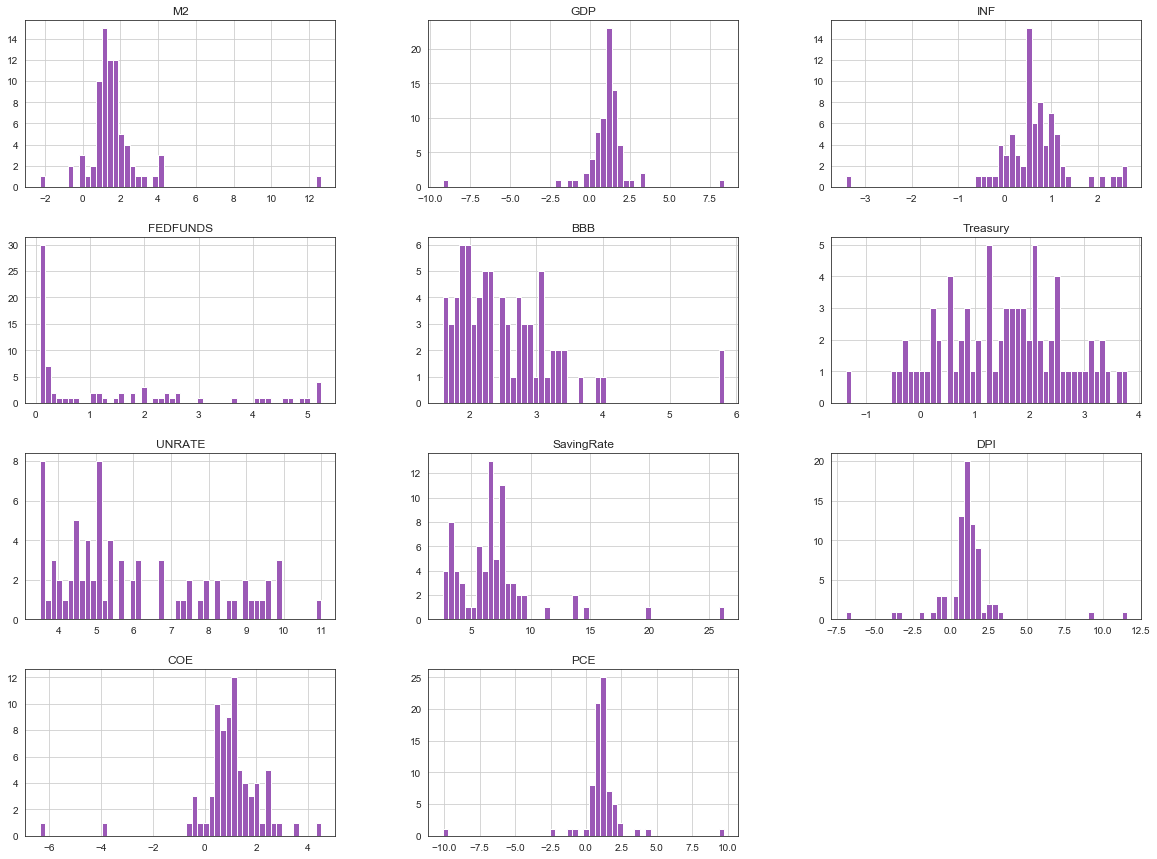

In [17]:
%matplotlib inline
X.hist(bins=50, figsize=(20,15))
plt.show()

## Split Data Set: in-sample vs. out-of-sample

In [18]:
ForecastDate = pd.to_datetime('2022-06-01')

In [19]:
idxTrain = mydata.index[pd.to_datetime(mydata.index) < ForecastDate]
print(idxTrain)

DatetimeIndex(['2004-04-01', '2004-07-01', '2004-10-01', '2005-01-01',
               '2005-04-01', '2005-07-01', '2005-10-01', '2006-01-01',
               '2006-04-01', '2006-07-01', '2006-10-01', '2007-01-01',
               '2007-04-01', '2007-07-01', '2007-10-01', '2008-01-01',
               '2008-04-01', '2008-07-01', '2008-10-01', '2009-01-01',
               '2009-04-01', '2009-07-01', '2009-10-01', '2010-01-01',
               '2010-04-01', '2010-07-01', '2010-10-01', '2011-01-01',
               '2011-04-01', '2011-07-01', '2011-10-01', '2012-01-01',
               '2012-04-01', '2012-07-01', '2012-10-01', '2013-01-01',
               '2013-04-01', '2013-07-01', '2013-10-01', '2014-01-01',
               '2014-04-01', '2014-07-01', '2014-10-01', '2015-01-01',
               '2015-04-01', '2015-07-01', '2015-10-01', '2016-01-01',
               '2016-04-01', '2016-07-01', '2016-10-01', '2017-01-01',
               '2017-04-01', '2017-07-01', '2017-10-01', '2018-01-01',
      

In [20]:
X_train = X.loc[idxTrain,:]
X_train.tail()

,M2,GDP,INF,FEDFUNDS,BBB,Treasury,UNRATE,SavingRate,DPI,COE,PCE
Date,,,,,,,,,,,
2021-04-01,3.299141,3.232518,2.130880,0.08,1.87,1.40,5.9,9.3,-6.915388,2.549218,4.408924
2021-07-01,2.207908,2.161091,1.282160,0.08,1.85,1.48,4.8,7.9,0.186904,2.487020,2.088582
2021-10-01,2.751770,3.335210,2.503029,0.08,1.85,1.46,3.9,7.5,0.240171,2.822692,2.269658
2022-01-01,0.685835,1.594502,2.344359,0.20,1.93,1.80,3.6,3.8,-0.994652,1.637502,2.137031
2022-04-01,-0.143437,2.032503,2.524072,1.21,2.31,1.26,3.6,2.7,1.178260,1.165730,2.264966


In [21]:
y_train = y.loc[idxTrain,:]
y_train.tail()

,Deposits
Date,
2021-04-01,1.338564
2021-07-01,2.702031
2021-10-01,3.101039
2022-01-01,1.047211
2022-04-01,-1.668218


In [22]:
idxTest = mydata.index[pd.to_datetime(mydata.index) >= ForecastDate]
X_test = X.loc[idxTest,:]
y_test = y.loc[idxTest,:]

In [23]:
np.size(y_train)

73

In [24]:
np.size(y_test)

3

## XGBoost Regression

In [25]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test, label = y_test)

param = {
    'eta': 0.3,
    'max_depth': 10,
    'objective': 'reg:squarederror'}

num_round = 200

bst = xgb.train(param, dtrain, num_round)

In [26]:
y_train_xgb = bst.predict(dtrain)

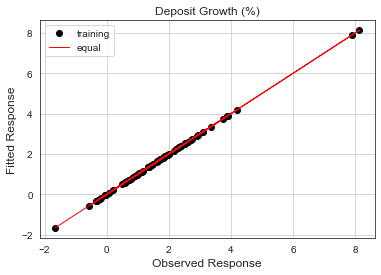

In [27]:
%matplotlib inline
plt.plot(y_train, y_train_xgb, 'ok', label='training')
plt.plot(y_train, y_train,'-r', lw=1, label='equal')
plt.legend(loc='best')
plt.title('Deposit Growth (%)', fontsize=12)
plt.xlabel('Observed Response', fontsize=12)
plt.ylabel('Fitted Response', fontsize=12)
plt.grid(True, axis='both')

In [28]:
from sklearn.metrics import mean_squared_error
xgb_mse = mean_squared_error(y_train, y_train_xgb)
xgb_rmse = np.sqrt(xgb_mse)
print(xgb_rmse)

0.000522191252706542


In [29]:
y_test_xgb = bst.predict(dtest)

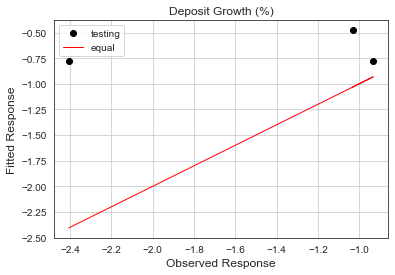

In [30]:
%matplotlib inline
plt.plot(y_test, y_test_xgb, 'ok', label='testing')
plt.plot(y_test, y_test,'-r', lw=1, label='equal')
plt.legend(loc='best')
plt.title('Deposit Growth (%)', fontsize=12)
plt.xlabel('Observed Response', fontsize=12)
plt.ylabel('Fitted Response', fontsize=12)
plt.grid(True, axis='both')

In [31]:
y_train_xgb_new = pd.DataFrame(y_train_xgb)
y_train_xgb_new.head()

,0
0,2.011352
1,1.837912
2,2.744117
3,1.880838
4,1.679337


In [32]:
y_xgb = pd.concat([pd.DataFrame(y_train_xgb),pd.DataFrame(y_test_xgb)], axis=0)
y_xgb.index = mydata.index
y_xgb.tail()

,0
Date,
2022-01-01,1.047263
2022-04-01,-1.667124
2022-07-01,-0.477970
2022-10-01,-0.777422
2023-01-01,-0.777516


In [33]:
mydata['xgb'] = y_xgb

Text(0.5, 1.0, 'Deposits Growth')

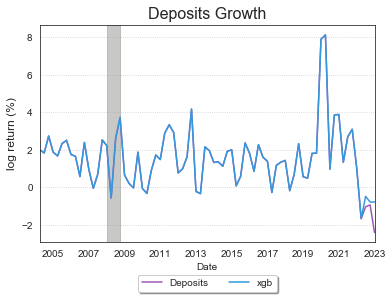

In [34]:
fig, ax = plt.subplots()
mydata[['Deposits','xgb']].plot(ax = ax)

ax.axvspan(recs2k_bgn, recs2k_end, color=sns.xkcd_rgb['grey'], alpha=0.5)
ax.axvspan(recs2k8_bgn, recs2k8_end,  color=sns.xkcd_rgb['grey'], alpha=0.5)

ax.legend(loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True)

ax.set_ylabel('log return (%)', fontsize=12)
ax.grid(True, axis='y', linestyle='dotted')
ax.set_title('Deposits Growth', fontsize=16)

In [35]:
from sklearn.metrics import r2_score
Rsquared = r2_score(y_test, y_test_xgb)
print(Rsquared)

-1.1991482552949937


## Visualize Boosting Trees

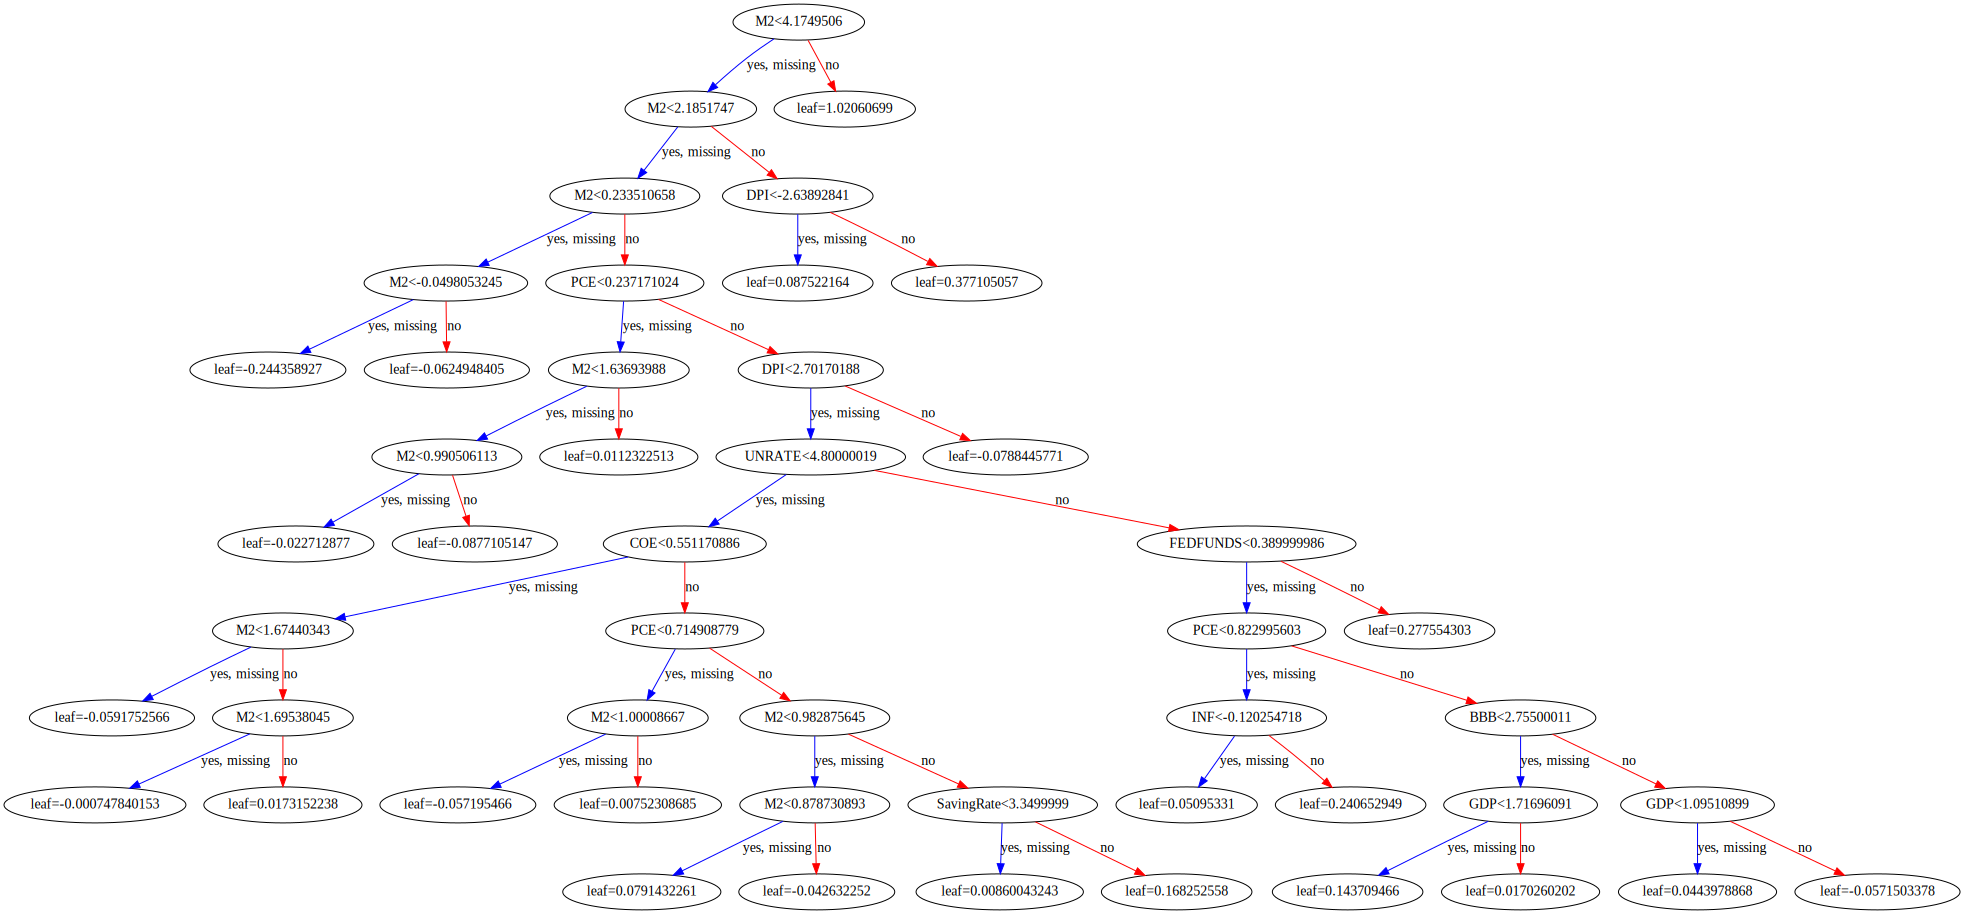

In [36]:
xgb.to_graphviz(bst, num_trees=2)

## Feature Importance

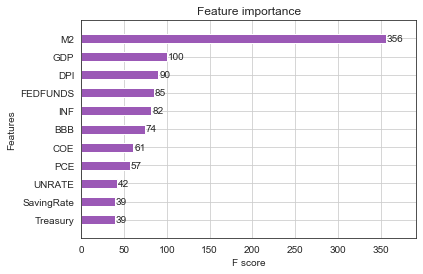

In [37]:
xgb.plot_importance(bst, height = 0.5)

## Conclusion

The money stock M2 shows significantly positive correlation with Domestic Office Deposits. Note that there is an descending trend of deposits since 2022 in the post-Covid period. The model forecast can't reasonably capture the descending trend in the out-of-sample testing.